In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [2]:
# Read the CSV file
data = pd.read_csv('Data/healthcare-dataset-stroke-data.CSV')

In [3]:
# Display the first few rows of the DataFrame data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Drop the column named 'id' from the DataFrame 'data'
data.drop('id',axis=1,inplace=True) 

In [5]:
# Display summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
# Generate descriptive statistics for the DataFrame 'data'
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Figure size 1000x600 with 0 Axes>

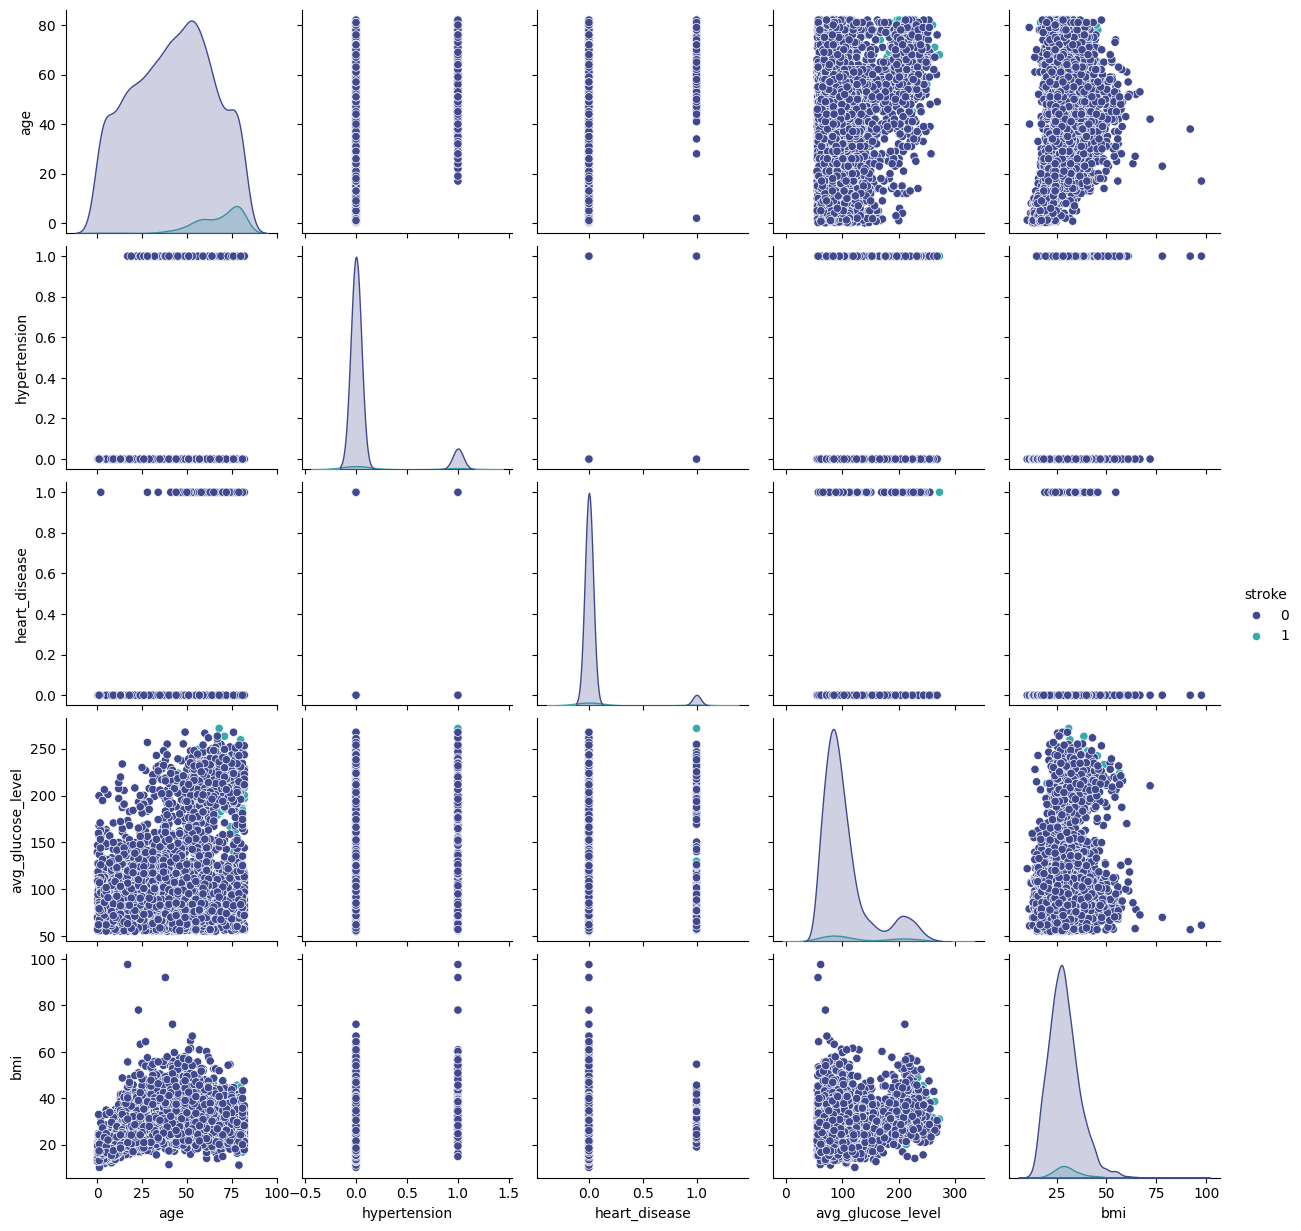

In [7]:
# For Visualization Set the size of the figure(pair plot)
plt.figure(figsize=(10,6))
sns.pairplot(data,hue='stroke',palette='mako')

In [8]:
# Check if there are any duplicated rows
data.duplicated().any()

False

In [9]:
# Check the number of missing values (null values) in each column
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

***Only bmi has nulls***

In [10]:
# Get the data types of each column in the DataFrame 'data'
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
# Select and display columns with numerical data types (integers and floats) from the DataFrame 'data'
numerical = data.select_dtypes(include=['int64','float64']).columns.tolist()
numerical

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

<Axes: xlabel='age', ylabel='Count'>

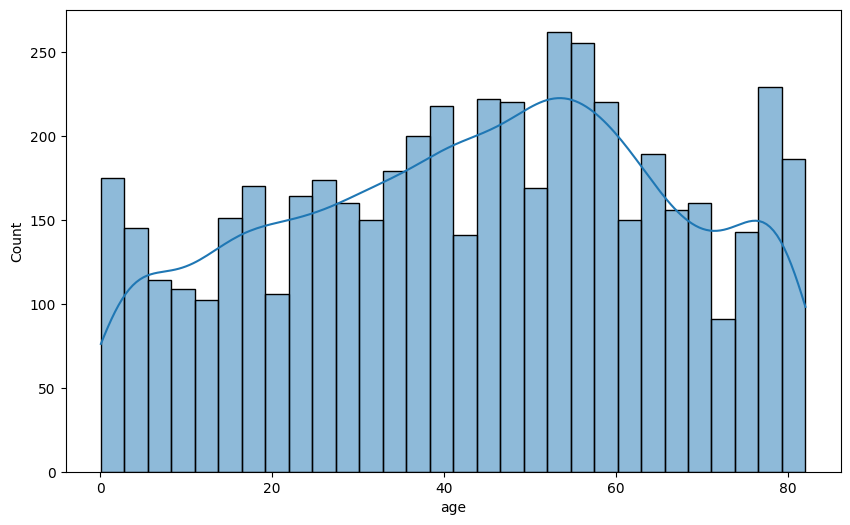

In [12]:
# Create a histogram of the 'age' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.histplot(data.age,kde=True,bins=30)

In [13]:
#filters the 'age' column where the age is less than 1 and then counts the occurrences of each unique value
data.age[data.age < 1].value_counts()

age
0.88    5
0.32    5
0.24    5
0.72    5
0.56    5
0.64    4
0.80    4
0.48    3
0.16    3
0.40    2
0.08    2
Name: count, dtype: int64

***Is that a mistake let's check***

In [14]:
#Retrieves all rows where the 'age' column has values less than 1
data[data.age < 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [15]:
#Filters the 'work_type' column where the corresponding age is less than 1 and checks if it's equal to 'children'
data.work_type[data.age < 1] == 'children'

363     True
376     True
564     True
982     True
996     True
1093    True
1206    True
1317    True
1600    True
1614    True
1808    True
1975    True
1999    True
2008    True
2012    True
2030    True
2358    True
2481    True
2490    True
2579    True
2630    True
2801    True
2875    True
2898    True
3251    True
3295    True
3392    True
3440    True
3618    True
3626    True
3859    True
3894    True
3968    True
4007    True
4021    True
4053    True
4293    True
4409    True
4581    True
4645    True
4910    True
4929    True
5089    True
Name: work_type, dtype: bool

In [16]:
#Counts the occurrences of each unique value in the 'hypertension' colum
data.hypertension.value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23fb602ecb0>,
 [Text(-1.3348942113978373, 0.42196853481811436, 'No Hypertension'),
  Text(1.1441950298751005, -0.3616873423402018, 'Hypertension')],
 [Text(-0.8581462787557526, 0.2712654866687878, '90.3%'),
  Text(0.6674471007604752, -0.21098428303178438, '9.7%')])

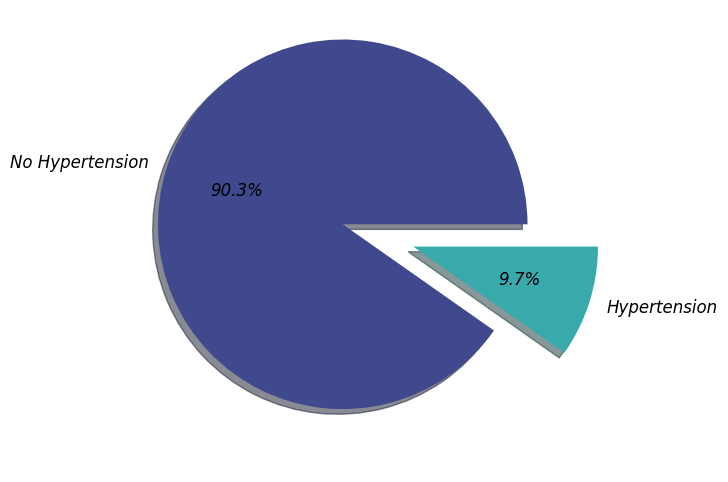

In [17]:
# Create a pie chart to visualize the distribution of hypertension
plt.figure(figsize=(10,6))
plt.pie(data.hypertension.value_counts(),labels=['No Hypertension','Hypertension'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

In [18]:
#counts the occurrences of each unique value in the 'heart_disease' column
data.heart_disease.value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23fb6099c30>,
 [Text(-1.3798936980729009, 0.23641781239723444, 'No Heart disease'),
  Text(1.182766015061574, -0.2026439084092213, 'Heart disease')],
 [Text(-0.8870745201897219, 0.1519828793982221, '94.6%'),
  Text(0.6899468421192514, -0.11820894657204575, '5.4%')])

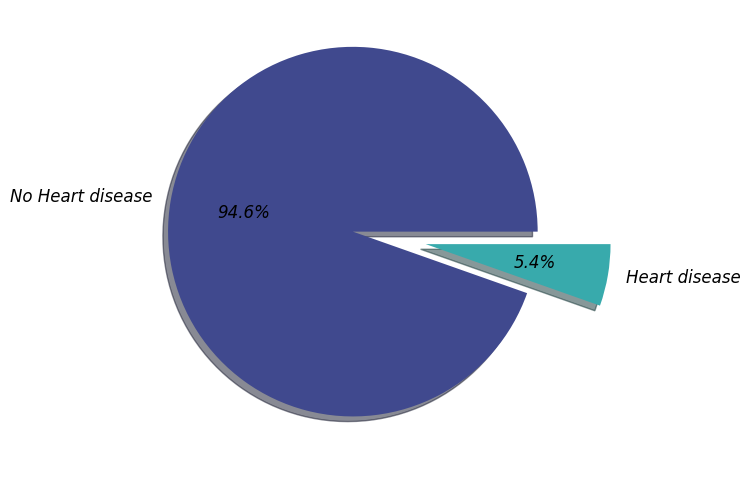

In [19]:
# Create a pie chart to visualize the distribution of heart disease
plt.figure(figsize=(10,6))
plt.pie(data.heart_disease.value_counts(),labels=['No Heart disease','Heart disease'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

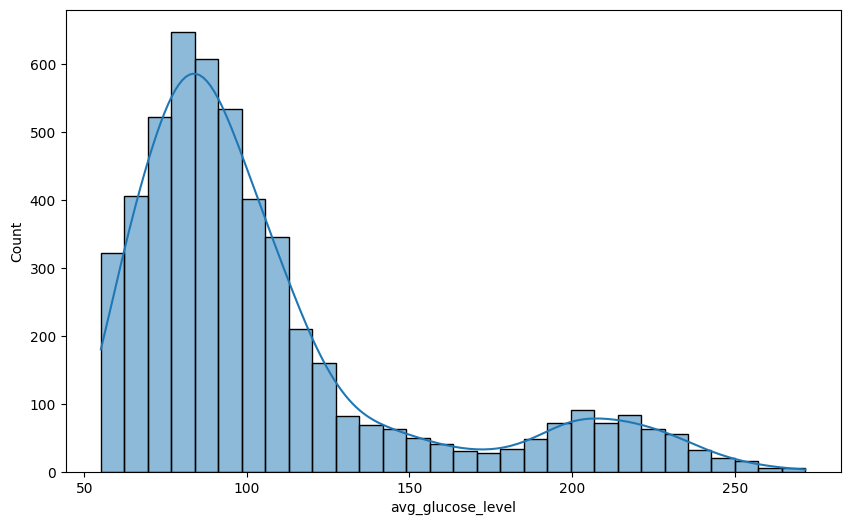

In [20]:
# Create a histogram of the 'avg_glucose_level' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.histplot(data.avg_glucose_level,kde=True,bins=30)

In [21]:
# Calculate descriptive statistics for the 'avg_glucose_level' column
data.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

<Axes: xlabel='bmi', ylabel='Count'>

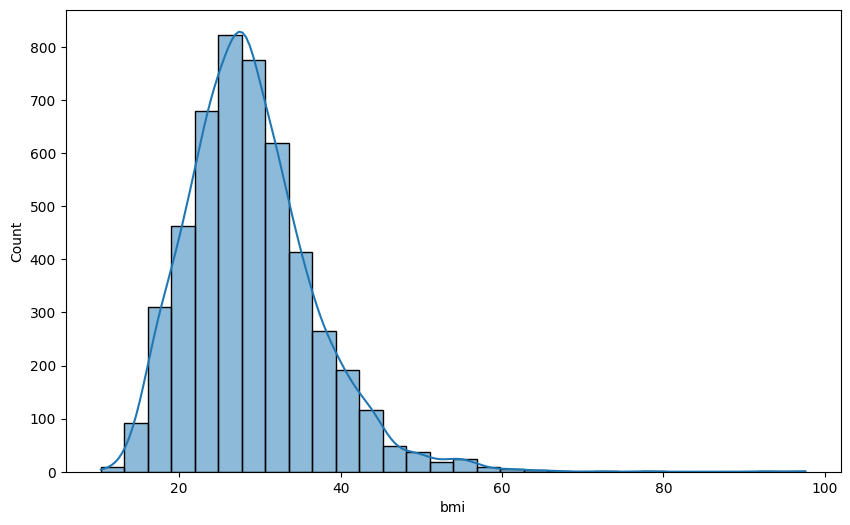

In [22]:
# Create a histogram of the 'bmi' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.histplot(data.bmi,kde=True,bins=30)

In [23]:
# Calculate descriptive statistics for the 'bmi' column
data.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [24]:
# Fill missing values in the 'bmi' column of the DataFrame 'data' with the mean value of the 'bmi' column
data.bmi.fillna(data.bmi.mean(),inplace=True)

<Axes: ylabel='age'>

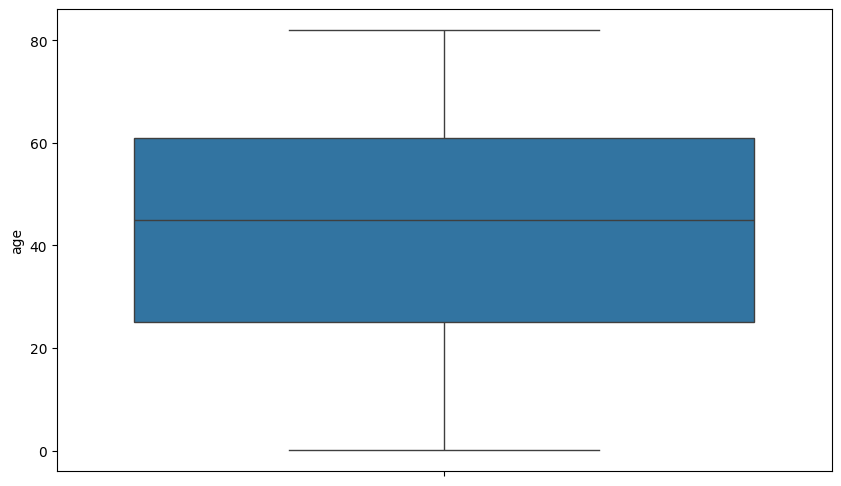

In [25]:
# Create a boxplot of the 'age' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.boxplot(data.age)

<Axes: ylabel='avg_glucose_level'>

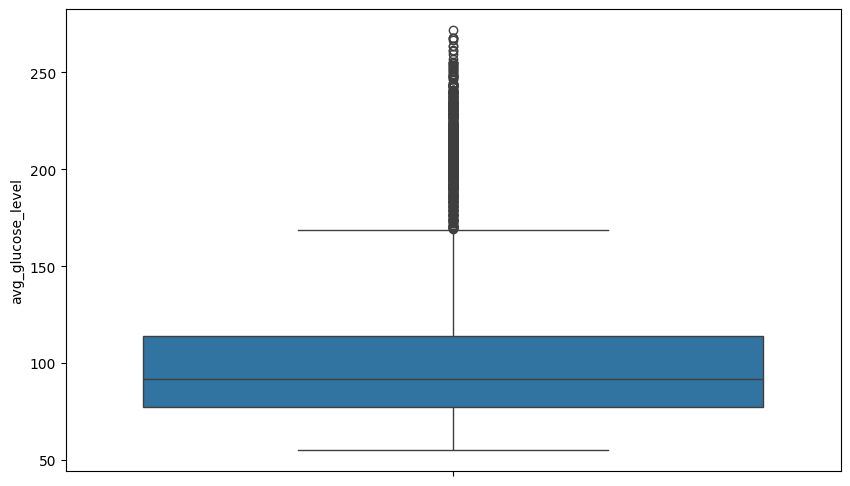

In [26]:
# Create a boxplot of the 'avg_glucose_level' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.boxplot(data.avg_glucose_level)

<Axes: ylabel='bmi'>

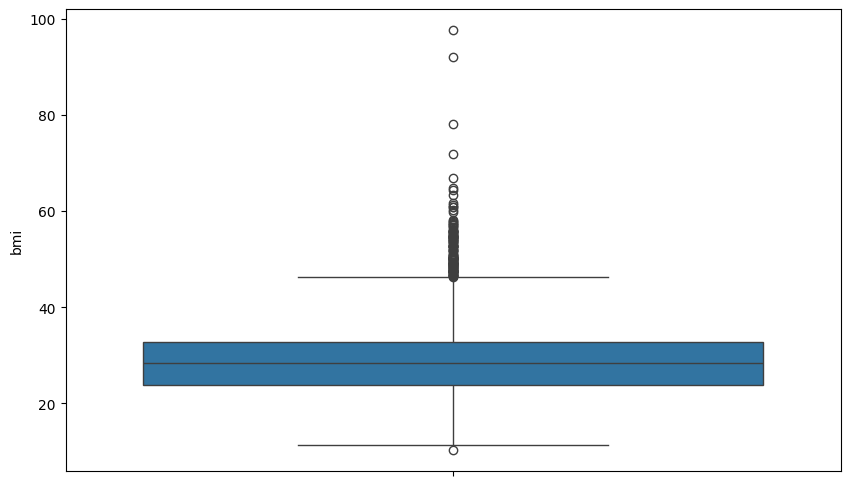

In [27]:
# Create a boxplot of the 'bmi' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.boxplot(data.bmi)

In [28]:
# Standardize the numerical columns in the DataFrame 'data' except for the last column
data[numerical[:-1]] = StandardScaler().fit_transform(data[numerical[:-1]])

In [29]:
# Calculate descriptive statistics for the DataFrame 'data' after standardization
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5110.000000
mean,5.005781e-17,-4.727682e-17,5.561978e-18,1.001156e-16,2.224791e-17,0.048728
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,0.215320
min,-1.908261e+00,-3.286019e-01,-2.389468e-01,-1.126958e+00,-2.415564e+00,0.000000
25%,-8.061152e-01,-3.286019e-01,-2.389468e-01,-6.383223e-01,-6.616944e-01,0.000000
50%,7.843218e-02,-3.286019e-01,-2.389468e-01,-3.149945e-01,-6.407951e-02,0.000000
75%,7.860701e-01,-3.286019e-01,-2.389468e-01,1.754080e-01,5.075521e-01,0.000000
max,1.714845e+00,3.043196e+00,4.185032e+00,3.657145e+00,8.926127e+00,1.000000


In [30]:
# Select categorical columns in the DataFrame 'data' and retrieve their column names as a list
categories = data.select_dtypes(include=['object']).columns.tolist()
categories

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [31]:
# Check the counts of unique values in the 'gender' column of the DataFrame 'data'
data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [32]:
# Remove rows where gender is 'Other' from the DataFrame 'data'
data.drop(data[data.gender == 'Other'].index,inplace=True)

# Reset the index of the DataFrame 'data' after removing rows
data.reset_index(drop=True,inplace=True)

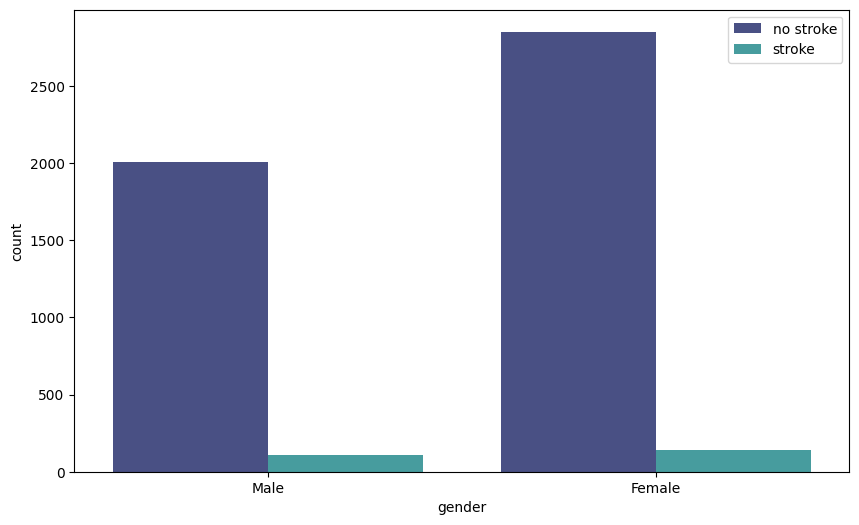

In [33]:
# Create a count plot of the 'gender' column in the DataFrame 'data'

plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=data, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [34]:
# Map 'Male' to 0 and 'Female' to 1 in the 'gender' column of the DataFrame 'data'
data.gender = data.gender.map({'Male':0,'Female':1})

In [35]:
# Check the counts of unique values in the 'ever_married' column of the DataFrame 'data'
data.ever_married.value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

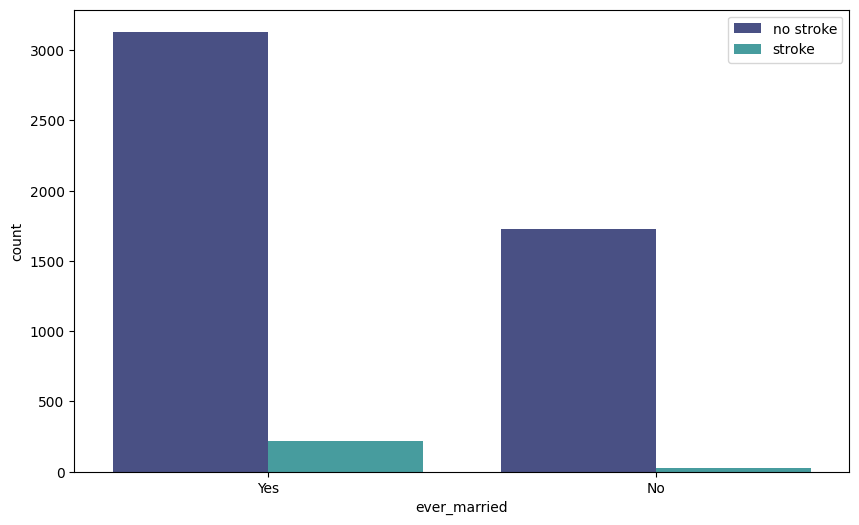

In [36]:
# Create a count plot of the 'ever_married' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.countplot(x="ever_married", data=data, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [37]:
# Map 'No' to 0 and 'Yes' to 1 in the 'ever_married' column of the DataFrame 'data'
data.ever_married = data.ever_married.map({'No':0,'Yes':1})

In [38]:
# Check the counts of unique values in the 'work_type' column of the DataFrame 'data'
data.work_type.value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

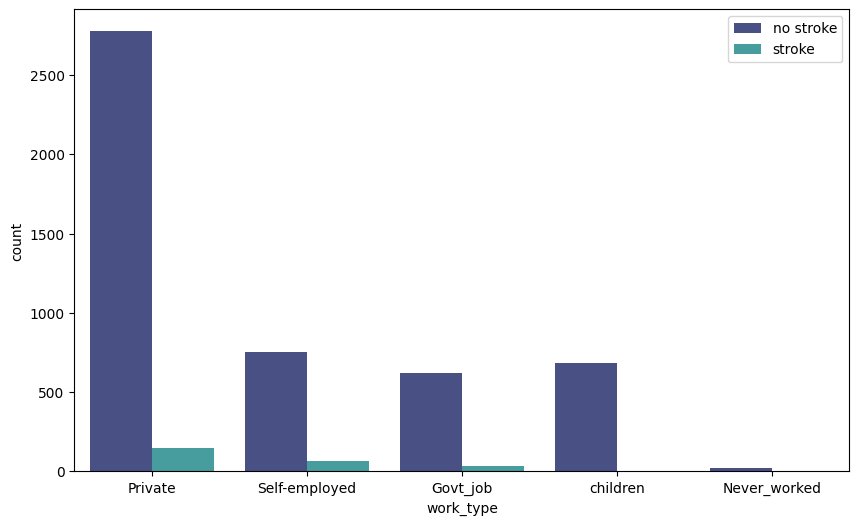

In [39]:
# Create a count plot of the 'work_type' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.countplot(x="work_type", data=data, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [40]:
# Map categorical values in the 'work_type' column to numerical values in the DataFrame 'data'
data.work_type = data.work_type.map({'Private':0,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4})

In [41]:
# Check the counts of unique values in the 'Residence_type' column of the DataFrame 'data'
data.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

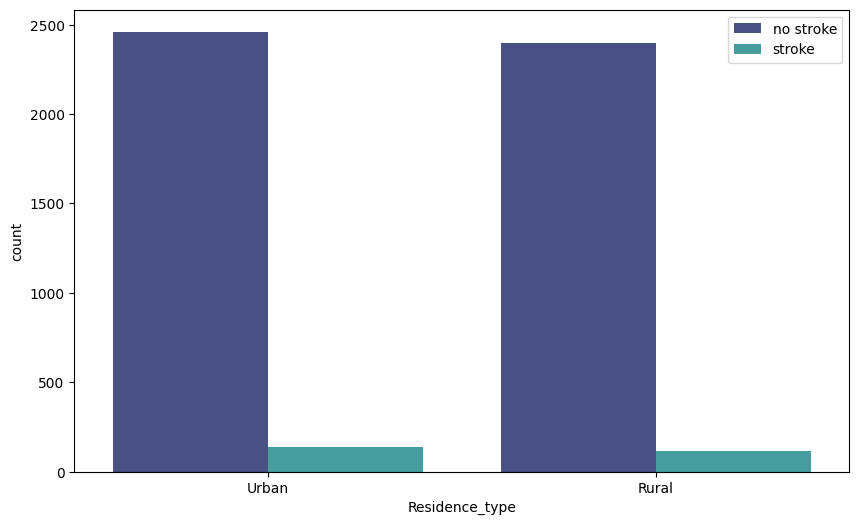

In [42]:
# Create a count plot of the 'Residence_type' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.countplot(x="Residence_type", data=data, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [43]:
# Map categorical values in the 'Residence_type' column to numerical values in the DataFrame 'data'
data.Residence_type = data.Residence_type.map({'Urban':0,'Rural':1})

In [44]:
# Check the counts of unique values in the 'smoking_status' column of the DataFrame 'data'
data.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

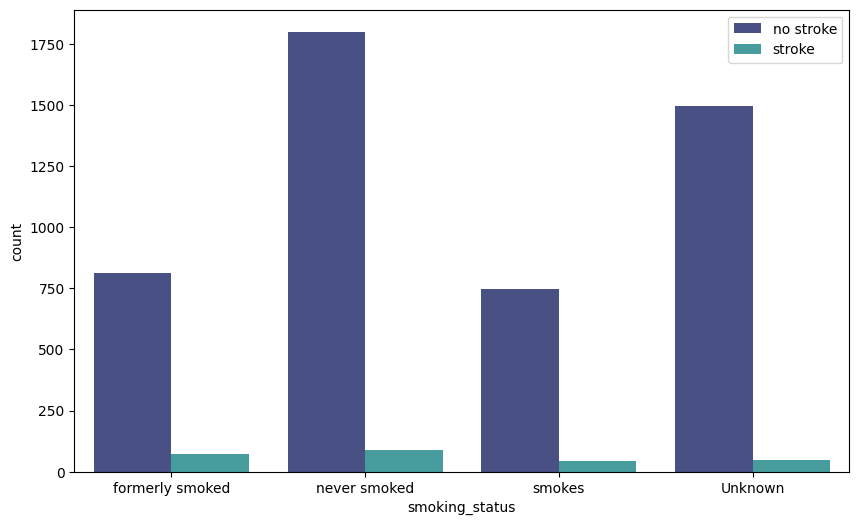

In [45]:
# Create a count plot of the 'smoking_status' column in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=data, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [46]:
# Map categorical values in the 'smoking_status' column to numerical values in the DataFrame 'data'
data.smoking_status = data.smoking_status.map({'never smoked':0,'formerly smoked':1,'smokes':2,'Unknown':3})

In [47]:
# Display the first few rows of the DataFrame 'data'
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1.051434,-0.328602,4.185032,1,0,0,2.706375,1.001234e+00,1,1
1,1,0.786070,-0.328602,-0.238947,1,1,1,2.121559,4.615554e-16,0,1
2,0,1.626390,-0.328602,4.185032,1,0,1,-0.005028,4.685773e-01,0,1
3,1,0.255342,-0.328602,-0.238947,1,0,0,1.437358,7.154182e-01,2,1
4,1,1.582163,3.043196,-0.238947,1,1,1,1.501184,-6.357112e-01,0,1


<Axes: >

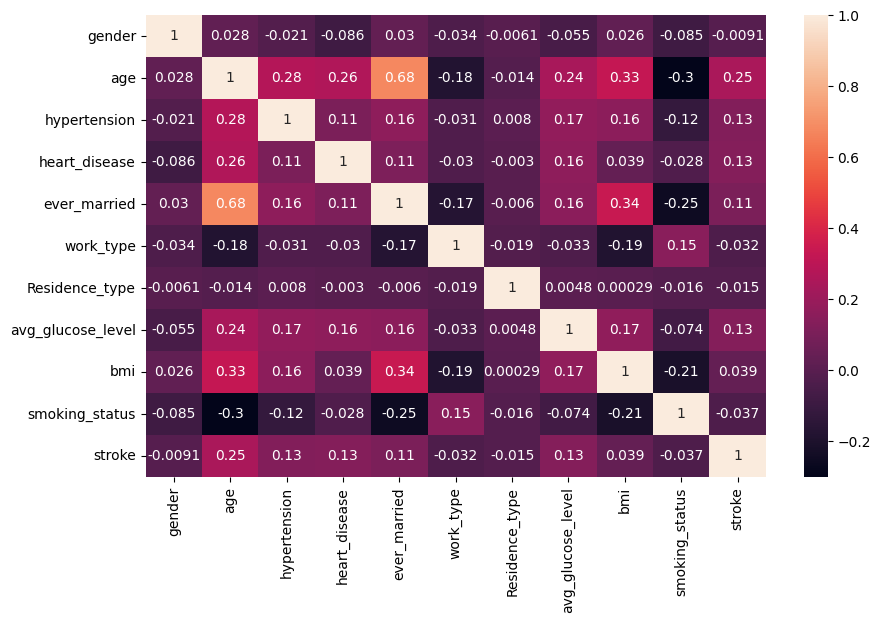

In [48]:
# Create a heatmap to visualize the correlation between different columns in the DataFrame 'data'
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [49]:
# Split the data into features (X) and target (y), where X contains all columns except 'stroke' and y contains only 'stroke'
X = data.drop('stroke',axis=1)
y = data.stroke
X.shape,y.shape

((5109, 10), (5109,))

In [50]:
# Display the counts of unique values in the 'stroke' column
y.value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23fb8791300>,
 [Text(-1.3836214247114578, 0.21352225429550808, 'No Stroke'),
  Text(1.1859612190393143, -0.18301908899014838, 'Stroke')],
 [Text(-0.8894709158859372, 0.13726430633282663, '95.1%'),
  Text(0.6918107111062667, -0.10676113524425322, '4.9%')])

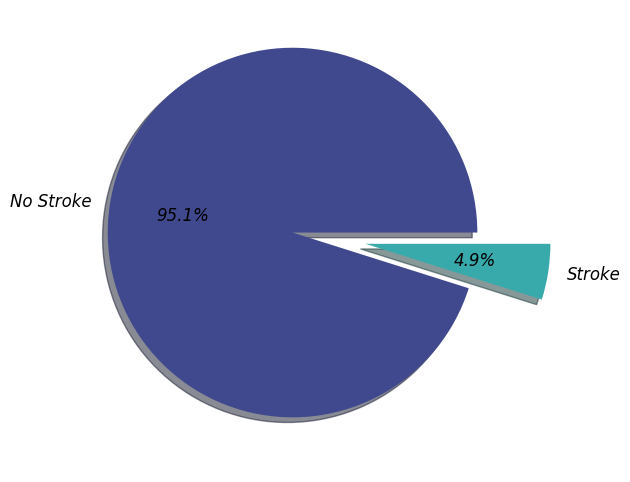

In [51]:
# Create a pie chart to visualize the distribution of the 'stroke' column
plt.figure(figsize=(10,6))
plt.pie(data.stroke.value_counts(),labels=['No Stroke','Stroke'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

In [52]:
# Import necessary modules from imblearn library
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE()

# Resample the dataset using SMOTE to handle class imbalance
X_resampled, y_resampled = smote.fit_resample(X, y)
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X, y)
rus = RandomUnderSampler(sampling_strategy='majority')

# Resample the dataset using RandomUnderSampler to handle class imbalance
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)


In [53]:
# Print the shapes of the resampled datasets
print(X_resampled.shape,y_resampled.shape)
print(X_over_resampled.shape,y_over_resampled.shape)
print(X_under_resampled.shape,y_under_resampled.shape)

(9720, 10) (9720,)
(9720, 10) (9720,)
(498, 10) (498,)


In [54]:
# Print the class distributions of the resampled datasets
print(y_resampled.value_counts())
print(y_over_resampled.value_counts())
print(y_under_resampled.value_counts())

stroke
1    4860
0    4860
Name: count, dtype: int64
stroke
1    4860
0    4860
Name: count, dtype: int64
stroke
0    249
1    249
Name: count, dtype: int64


# *SMOTE*

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1458
           1       0.91      0.96      0.94      1458

    accuracy                           0.93      2916
   macro avg       0.94      0.93      0.93      2916
weighted avg       0.94      0.93      0.93      2916



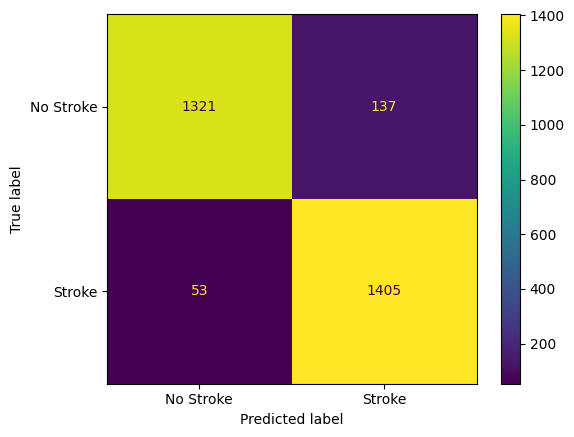

In [55]:
# Split the resampled data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)
# Initialize the RandomForestClassifier model with a random state for reproducibility
model = RandomForestClassifier(random_state=1234)
# Train the RandomForestClassifier model on the training data
model.fit(X_train,y_train)

# Predict the target variable 'stroke' on the testing data
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
# Create ConfusionMatrixDisplay object with the confusion matrix and display labels
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

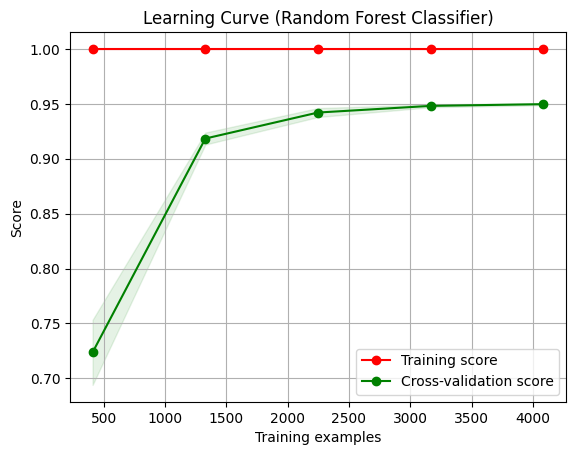

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the learning curve.

    Parameters:
    - estimator: the machine learning model to evaluate
    - title: title for the plot
    - X: input features
    - y: target variable
    - ylim: tuple (min, max) for the y-axis limits
    - cv: number of folds for cross-validation
    - n_jobs: number of parallel jobs to run (-1 uses all processors)
    - train_sizes: array-like, proportions of the dataset to use for training

    Returns:
    - Plot of the learning curve
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Calculate learning curve using learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation of test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curve (Random Forest Classifier)"
plot_learning_curve(model, title, X, y, cv=5)
plt.show()

In [58]:
import joblib
joblib.dump(model, 'Random_forest_classifier_model.joblib')


['Random_forest_classifier_model.joblib']

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1458
           1       0.78      0.83      0.81      1458

    accuracy                           0.80      2916
   macro avg       0.80      0.80      0.80      2916
weighted avg       0.80      0.80      0.80      2916



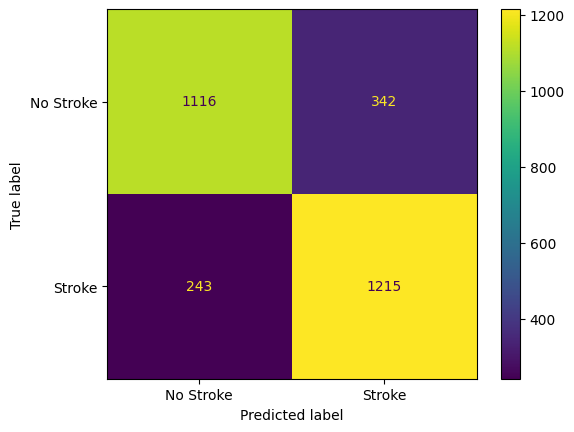

In [59]:
# Import Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the Logistic Regression model on the training data
model.fit(X_train,y_train)

# Predict the target variable 'stroke' on the testing data
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

# Create ConfusionMatrixDisplay object with the confusion matrix and display labels
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()


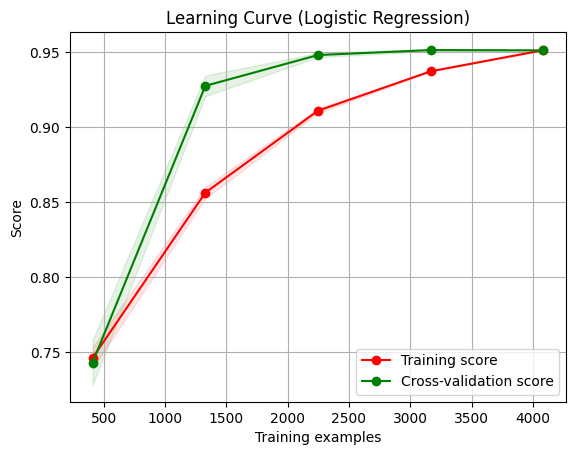

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    """
    Generate a simple plot of the learning curve.

    Parameters:
    - estimator: the machine learning model to evaluate
    - title: title for the plot
    - X: input features
    - y: target variable
    - ylim: tuple (min, max) for the y-axis limits
    - cv: number of folds for cross-validation
    - n_jobs: number of parallel jobs to run (-1 uses all processors)
    - train_sizes: array-like, proportions of the dataset to use for training

    Returns:
    - Plot of the learning curve
    """
    
    plt.figure()
    plt.title(title)

    # Set y-axis limits if provided
    if ylim is not None:
        plt.ylim(*ylim)

    # Set labels for x and y axes
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Calculate learning curve using learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation of test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Logistic Regression model
title = "Learning Curve (Logistic Regression)"
plot_learning_curve(model, title, X, y, cv=5)
plt.show()

In [61]:
joblib.dump(model, 'Logistic_regression_model.joblib')


['Logistic_regression_model.joblib']

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1458
           1       0.88      0.90      0.89      1458

    accuracy                           0.89      2916
   macro avg       0.89      0.89      0.89      2916
weighted avg       0.89      0.89      0.89      2916



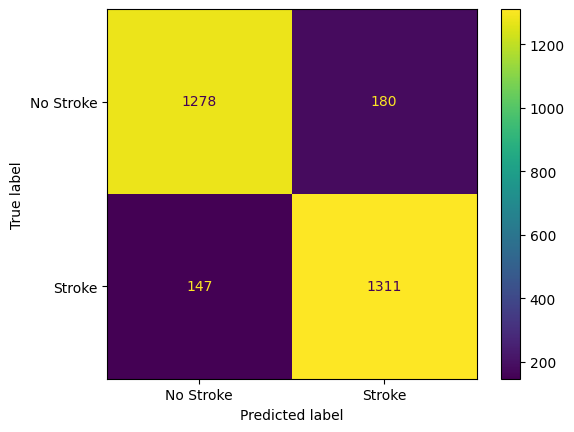

In [62]:
# Import Decision Tree Classifier model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier model
model = DecisionTreeClassifier()

# Train the Decision Tree Classifier model on the training data
model.fit(X_train,y_train)

# Predict the target variable 'stroke' on the testing data
y_pred = model.predict(X_test)

# Print the classification report to evaluate the performance of the Decision Tree Classifier model
print(classification_report(y_test,y_pred))

# Create ConfusionMatrixDisplay object with the confusion matrix and display labels
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()


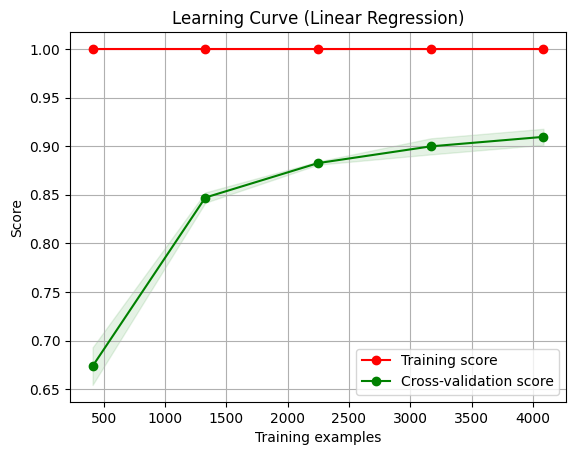

In [63]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Calculate learning curve using learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    # Calculate mean and standard deviation of test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Logistic Regression model
title = "Learning Curve (Linear Regression)"
plot_learning_curve(model, title, X, y, cv=5)
plt.show()

In [64]:
joblib.dump(model, 'Decision_tree_model.joblib')

['Decision_tree_model.joblib']